# W13 M: Interactive Visualization with IPyWidgets

DS 2023 | Communicating with Data

<hr />

This notebook introduces IPyWidgets, a simple and powerful way to add interactivity to and build simple dashboards in Jupyter.

The examples used are adapted from [this G4G artitcle](https://www.geeksforgeeks.org/data-visualization/creating-dynamic-visualizations-using-ipython-notebook-widget/).

As always, for more information about this topic, read  [the documentation site](https://ipywidgets.readthedocs.io/en/stable/index.html).

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets

In [2]:
sns.set_theme(context='notebook', style='white')

## Map a widget to a function using `interact`

Using interactive widgets is a simple process:

1. Get some data.
2. Wrap a visualization of the data in a function.
3. Define a widget for each visualization function argument you want to manipulate.
4. Map the widgets to the function.

## Example 1

In [3]:
# 1. Get some data
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# 2. Wrap visualization in a argument 
# using parameters that you want to change
def update_plot(freq=1.0):
    plt.figure(figsize=(8, 4))
    plt.plot(x, np.sin(freq * x))
    plt.title(f'Sine Wave ($f$ = {round(freq, 3)})')
    plt.xlabel('x')
    plt.ylabel('sin(x)')
    plt.grid(True)
    plt.show()

# 3. Create a widget that will change the value
# of the argument in the function above
freq_slider = widgets.FloatSlider(
    value = 1.0, 
    min = 0.1, 
    max = 5.0, 
    step = 0.1, 
    description = 'Frequency:'
)

# 4. Map the widget to the function
widgets.interact(update_plot, freq=freq_slider);

interactive(children=(FloatSlider(value=1.0, description='Frequency:', max=5.0, min=0.1), Output()), _dom_clas…

## Example 2

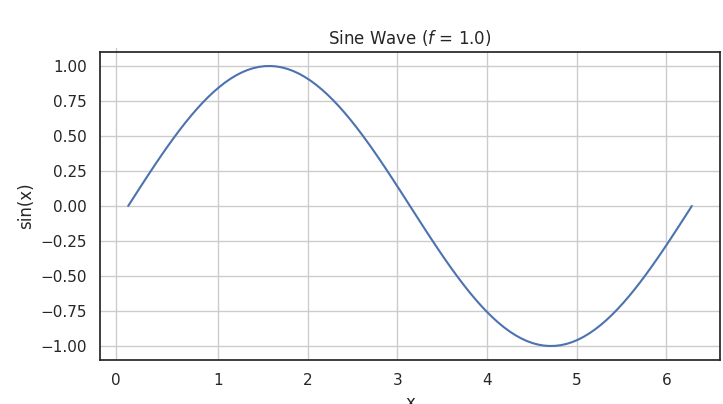

interactive(children=(Dropdown(description='Select Species:', options=('setosa', 'versicolor', 'virginica'), v…

In [4]:
# Get some data
df = sns.load_dataset('iris')

# Create a function for plotting the data
def update_plot(selected_species, sepal_length):
    filtered_df = df[df["species"] == selected_species]
    sns.scatterplot(x="sepal_length", y="sepal_width", data=filtered_df)
    plt.title(f"Scatterplot for {selected_species}")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.axvline(x=sepal_length, color="r", linestyle="--")
    plt.show()

# Create widgets for each function parameter
species_dropdown = widgets.Dropdown(
    options=df["species"].unique(),
    value=df["species"].unique()[0],
    description="Select Species:",
)
sepal_length_slider = widgets.FloatSlider(
    value=df["sepal_length"].mean(),
    min=df["sepal_length"].min(),
    max=df["sepal_length"].max(),
    step=0.1,
    description="Sepal Length:"
)

# Map the widgets to the function
widgets.interact(update_plot, selected_species=species_dropdown, sepal_length=sepal_length_slider);

## Example 3: 3D Scatter Plot

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# Generate 3D data
np.random.seed(0)
data = np.random.rand(100, 3)

# Define a visualization function
def update_3d_scatter(x_limit, y_limit, z_limit, w=8, h=6):
    fig = plt.figure(figsize=(w, h))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2])
    ax.set_xlim(x_limit)
    ax.set_ylim(y_limit)
    ax.set_zlim(z_limit)
    ax.set_title('3D Scatter Plot')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Create sliders for function arguments
x_limit_slider = widgets.FloatRangeSlider(
    min=0, max=1, step=0.01, value=[0, 1], description='X-Limit'
)
y_limit_slider = widgets.FloatRangeSlider(
    min=0, max=1, step=0.01, value=[0, 1], description='Y-Limit'
)
z_limit_slider = widgets.FloatRangeSlider(
    min=0, max=1, step=0.01, value=[0, 1], description='Z-Limit'
)
h_slider = widgets.IntSlider(min=1, max=20, step=.5, value=6)
w_slider = widgets.IntSlider(min=1, max=20, step=.5, value=8)

# Map widgets to the function
widgets.interact(
    update_3d_scatter, 
    x_limit=x_limit_slider, 
    y_limit=y_limit_slider, 
    z_limit=z_limit_slider,
    h = h_slider,
    w = w_slider
);

interactive(children=(FloatRangeSlider(value=(0.0, 1.0), description='X-Limit', max=1.0, step=0.01), FloatRang…

### Putting widgets in a dictionary

In [6]:
# Create sliders for function arguments
# Directly map them to function arguments
limit_slider_args = dict(min=0, max=1, step=0.01, value=[0, 1])
size_slider_args = dict(min=1, max=20, step=.5)
widget_funcs = dict(
    x_limit = widgets.FloatRangeSlider(**limit_slider_args, description='X-Limit'),
    y_limit = widgets.FloatRangeSlider(**limit_slider_args, description='Y-Limit'),
    z_limit = widgets.FloatRangeSlider(**limit_slider_args, description='Z-Limit'),
    w = widgets.IntSlider(**size_slider_args, value=8),
    h = widgets.IntSlider(**size_slider_args, value=6)
)

# Link the sliders to the update function
widgets.interact(update_3d_scatter, **widget_funcs);

interactive(children=(FloatRangeSlider(value=(0.0, 1.0), description='X-Limit', max=1.0, step=0.01), FloatRang…

### Putting widgets directly in the arguments

In [7]:
# Directly the sliders to the update function
widgets.interact(
    update_3d_scatter, 
    x_limit = widgets.FloatRangeSlider(**limit_slider_args, description='X-Limit'),
    y_limit = widgets.FloatRangeSlider(**limit_slider_args, description='Y-Limit'),
    z_limit = widgets.FloatRangeSlider(**limit_slider_args, description='Z-Limit'),
    w = widgets.IntSlider(**size_slider_args, value=8),
    h = widgets.IntSlider(**size_slider_args, value=6)
);

interactive(children=(FloatRangeSlider(value=(0.0, 1.0), description='X-Limit', max=1.0, step=0.01), FloatRang…

### Save as an object to use elsewhere with `interactive`.

In [8]:
# Directly the sliders to the update function
w1 = widgets.interactive(
    update_3d_scatter, 
    x_limit = widgets.FloatRangeSlider(**limit_slider_args, description='X-Limit'),
    y_limit = widgets.FloatRangeSlider(**limit_slider_args, description='Y-Limit'),
    z_limit = widgets.FloatRangeSlider(**limit_slider_args, description='Z-Limit'),
    w = widgets.IntSlider(**size_slider_args, value=8),
    h = widgets.IntSlider(**size_slider_args, value=6)
)

And then open the widget anywhere.

In [9]:
w1

interactive(children=(FloatRangeSlider(value=(0.0, 1.0), description='X-Limit', max=1.0, step=0.01), FloatRang…

## Available Widgets

<table class="GFGEditorTheme__table"><colgroup><col><col></colgroup><thead><tr><th class="GFGEditorTheme__tableCell GFGEditorTheme__tableCellHeader"><p dir="ltr"><span>Widget</span></p>

</th><th class="GFGEditorTheme__tableCell GFGEditorTheme__tableCellHeader"><p dir="ltr"><span>Description</span></p>

</th></tr></thead><tbody><tr><td class="GFGEditorTheme__tableCell"><p dir="ltr"><span>Text Widget</span></p>

</td><td class="GFGEditorTheme__tableCell"><p dir="ltr"><span>Provides a text input field for users to input text or string values. </span></p>

</td></tr><tr><td class="GFGEditorTheme__tableCell"><p dir="ltr"><span>Button Widget</span></p>

</td><td class="GFGEditorTheme__tableCell"><p dir="ltr"><span> Triggers a user-defined action when clicked. </span></p>

</td></tr><tr><td class="GFGEditorTheme__tableCell"><p dir="ltr"><span>Image Widget</span></p>

</td><td class="GFGEditorTheme__tableCell"><p dir="ltr"><span> Displays an image within a notebook cell. </span></p>

</td></tr><tr><td class="GFGEditorTheme__tableCell"><p dir="ltr"><span>Input Widget</span></p>

</td><td class="GFGEditorTheme__tableCell"><p dir="ltr"><span>Allows users to enter text, numbers, or other types of data. data entry and forms are commonly used.</span></p>

</td></tr><tr><td class="GFGEditorTheme__tableCell"><p dir="ltr"><span>Checkbox Widget</span></p>

</td><td class="GFGEditorTheme__tableCell"><p dir="ltr"><span>Presents a checkbox for binary selections (true/false or on/off). </span></p>

</td></tr><tr><td class="GFGEditorTheme__tableCell"><p dir="ltr"><span>Dropdown Widget</span></p>

</td><td class="GFGEditorTheme__tableCell"><p dir="ltr"><span>Offers a dropdown menu for selecting one option from a list. </span></p>

</td></tr><tr><td class="GFGEditorTheme__tableCell"><p dir="ltr"><span>Slider Widget</span></p>

</td><td class="GFGEditorTheme__tableCell"><p dir="ltr"><span> Permits users to choose a numeric value within a specified range by sliding a handle. </span></p>

</td></tr><tr><td class="GFGEditorTheme__tableCell"><p dir="ltr"><span>Progress Widget</span></p>

</td><td class="GFGEditorTheme__tableCell"><p dir="ltr"><span>Displays a progress bar or indicator. </span></p>

</td></tr><tr><td class="GFGEditorTheme__tableCell"><p dir="ltr"><span>Data Picker Widget</span></p>

</td><td class="GFGEditorTheme__tableCell"><p dir="ltr"><span>Enables users to select a date from a calendar. </span></p>

</td></tr></tbody></table>

See the full list [here](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html).

## Installation

```bash
pip install ipywidgets
jupyter labextension install @jupyter-widgets/jupyterlab-manager
```